# Module 8.  Assignment 1. Machine Learning. Breast_Cancer dataset library sklearn.

This assignment, we have split it into two main parts. First of all, we have analyzed every model individually and after that, we have done a comparative analysis between them. 

Before we start to analyze any model of classification we want to do some considerations:

For this task, we have paid attention four parameters mainly. Those are Score/accuracy, precision_score, recall_score and failures of the model.

We'll plot Learning Curve, it'll shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

We'll create a Confusion matrix, this is a specific table layout that allows visualization of the performance of an algorithm. Each colum of the matrix represents the instances in a predicted class while each row represents the instances in an actual class. it makes it easy to see if the system is confusing several classes. it can happen that you can get a good accuracy and however a bad recall or precision, in other words a bad behaviour between some classes because the model is confusing them. The model works good in general but for some classes in particular not.


### NOTE: Please, first of all, I recommended you read the analysis about stratified and balanced data before continuing  (Task 5).





In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit

## 1) Loading breast_cancer Data


In [43]:
breast_cancer = load_breast_cancer()

## 2) Describing dataset

In [44]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [45]:
print(breast_cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [46]:
n_samples, n_features = breast_cancer.data.shape
print('Number of samples: ', n_samples)
print('Number of features: ', n_features)
print('Number of categories: ', np.size(np.unique(breast_cancer.target)), '/ Types of categories: ',breast_cancer.target_names)
print('Sample: ','\n',breast_cancer.data[1])

Number of samples:  569
Number of features:  30
Number of categories:  2 / Types of categories:  ['malignant' 'benign']
Sample:  
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
   8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
   1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
   3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
   1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
   2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
   1.23800000e-01   1.86600000e-01   2.41600000e-01   1.86000000e-01
   2.75000000e-01   8.90200000e-02]


# 3) Estimators seen in class

## Using KNeighborsClassifier Estimator with StratifiedShuffleSplit

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.
The folds are made by preserving the percentage of samples for each class. Contrary to other cross-validation strategies, random splits do not guarantee that all folds will be different, although this is still very likely for sizeable datasets. 

The classifier estimator chosen is the most simple of all, this classifier implementing the k-nearest neighbors vote. This is called KNeighborsClassifier.


In [47]:
X=breast_cancer.data
y=breast_cancer.target

Failures = []

# We create both instances.

breast_cancertratified = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=124)

EstimatorKNN = KNeighborsClassifier(n_neighbors=3)

# We applicated split method.

for train_index, test_index in breast_cancertratified.split(X, y):
       
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

        # Now, we have dataset prepared to fit and predict it. For this, we used fit and predict methods.
        EstimatorKNN.fit(X_train, y_train)
        Y_prediction =EstimatorKNN.predict(X_test)

        # We calculate number of failures.
        Failures.append(sum(Y_prediction != y_test))


# Afterthat, We calculate The score.

score_test = EstimatorKNN.score(X_test,y_test)
score_train = EstimatorKNN.score(X_train,y_train)

print('score_train: ', score_train)
print('score_test: ', score_test)

# We could also use metric function.

accs = accuracy_score (Y_prediction, y_test)

print("Accuracy_score:" , accs,'\n')

# Finally, we show several results such as:

print("Num. medio de errores de: "  + str(100*np.mean(Failures)/len(y_test)))    
print("Dev. Std. de errores de: " + str(100*np.std(Failures)/len(y_test))) 
print("Failures: ",Failures,'\n')
print("breast_cancertratified instance: ", breast_cancertratified, '\n')    
print("n_splits: ",breast_cancertratified.get_n_splits(X,y), '\n')

score_train:  0.947236180905
score_test:  0.93567251462
Accuracy_score: 0.93567251462 

Num. medio de errores de: 7.60233918129
Dev. Std. de errores de: 2.52660456078
Failures:  [9, 19, 11] 

breast_cancertratified instance:  StratifiedShuffleSplit(n_splits=3, random_state=124, test_size=0.3,
            train_size=None) 

n_splits:  3 



##  Learning Curves KNeighborsClassifier Estimator with StratifiedShuffleSplit

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


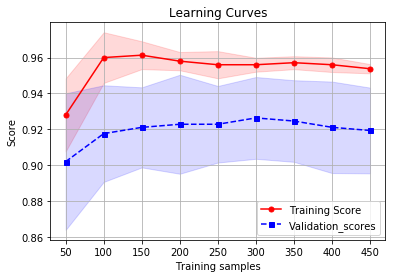

Training samples:  [ 50 100 150 200 250 300 350 400 450]
Training_Scores:  [ 0.928       0.96        0.96133333  0.958       0.956       0.956
  0.95714286  0.956       0.95377778]
Validation_scores:  [ 0.90190073  0.9175529   0.92103117  0.9227703   0.9227703   0.92631012
  0.92457099  0.92106195  0.91929204]


In [48]:
EstimatorKNN = KNeighborsClassifier(n_neighbors=3)

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    EstimatorKNN,  X ,  y , shuffle = True, random_state = 42,  
        train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_SSS = np.mean(valid_scores, axis=1)
valid_std_SSS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_SSS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_scores')
plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()

print('Training samples: ' ,train_sizes)
print('Training_Scores: ',train_mean)
print('Validation_scores: ',valid_mean_SSS)

We can see that validation_score moves between 0.9 and 0.93 range and training_score between 0.93 and 0.97 range. Once we are aware of this and that we are moving in a narrow range. We can see that more data aren't increasing the score, we have a bias. We should try it with others more complex models.

In [49]:
# Other types of metrics score: 
# Note: average = 'micro' Calculate metrics globally by counting the total true positives, false negatives and false positives.

print('precision_score: ', precision_score(y_test, Y_prediction, average='micro'))
print('recall_score: ', recall_score(y_test, Y_prediction, average='micro'))

precision_score:  0.93567251462
recall_score:  0.93567251462


#### About Metrics score above:

Precision_score: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

Recall_score: The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

## Using KNeighborsClassifier Estimator with cross_val_score

By partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. A solution to this problem is a procedure called cross-validation (CV for short). A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV.

In [50]:
X=breast_cancer.data
y=breast_cancer.target

# Classifier implementing the k-nearest neighbors vote and evaluate a score by cross-validation. You can see that we introduce
# the estimatorKNN as a parameter into cross-validation instance.

EstimatorKNN = KNeighborsClassifier()
CVS_EstimatorKNN= cross_val_score(EstimatorKNN,X,y,cv=10)

# Printing the results:

print('cv scores: ', CVS_EstimatorKNN)

# Now, we calculate the mean of cv scores, and this will be our outcome:

print('Mean: ',np.mean(CVS_EstimatorKNN)) 
print('Std: ',np.std(CVS_EstimatorKNN)) 
print('nº cv: ',CVS_EstimatorKNN.size)



cv scores:  [ 0.9137931   0.87931034  0.89473684  0.96491228  0.94736842  0.92982456
  0.96491228  0.92857143  0.91071429  0.96428571]
Mean:  0.929842926281
Std:  0.0289210399754
nº cv:  10


## Graphic adjustment by K-neighbors

Graphic adjustment of K-neighbors. We use this graph to see where KNeighborsClassifier works better for a give number of n_neighbors.


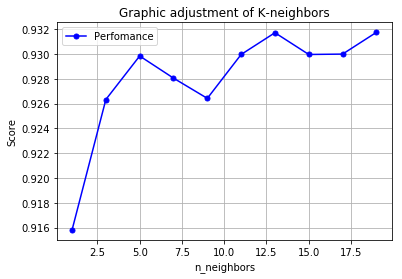

In [51]:
eval_prec_mean =[]
eval_prec_std = []

max_deep_list = list(range(1,20,2))

for deep in max_deep_list:
    EstimatorKNN = KNeighborsClassifier(n_neighbors=deep)
    CVS_EstimatorKNN = cross_val_score(EstimatorKNN,X,y,cv=10)
    eval_prec_mean.append(np.mean(CVS_EstimatorKNN))
    eval_prec_std.append(np.std(CVS_EstimatorKNN))
    
plt.plot(max_deep_list, eval_prec_mean, color='b', marker='o', markersize=5, label='Perfomance')
plt.title('Graphic adjustment of K-neighbors')
plt.legend()
plt.ylabel('Score')
plt.xlabel('n_neighbors')
plt.grid()
plt.show()

eval_prec_mean =[]
eval_prec_std = []

max_deep_list = list(range(1,20,2))

This graph shows us the Score as a function of the number of n_eighbors. We can see that with n_neighbors = 13 or 19,
we get higher score value.

## 6) Task: Using KNeighborsClassifier Estimator (weights) with GridSearchCV

Grid searchCV is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. Algorithm parameter tuning is an important step for improving algorithm performance right before presenting results or preparing a system for production.


In [52]:
X=breast_cancer.data
y=breast_cancer.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

breast_cancertratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=142)

for train_index, test_index in breast_cancertratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. 

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance']}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator = Grid_S_CV.best_estimator_
Best_Grid_estimator.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

ParameterGrid:  
 [{'n_neighbors': 3, 'weights': 'uniform'}, {'n_neighbors': 3, 'weights': 'distance'}, {'n_neighbors': 5, 'weights': 'uniform'}, {'n_neighbors': 5, 'weights': 'distance'}, {'n_neighbors': 7, 'weights': 'uniform'}, {'n_neighbors': 7, 'weights': 'distance'}, {'n_neighbors': 9, 'weights': 'uniform'}, {'n_neighbors': 9, 'weights': 'distance'}, {'n_neighbors': 11, 'weights': 'uniform'}, {'n_neighbors': 11, 'weights': 'distance'}, {'n_neighbors': 13, 'weights': 'uniform'}, {'n_neighbors': 13, 'weights': 'distance'}, {'n_neighbors': 15, 'weights': 'uniform'}, {'n_neighbors': 15, 'weights': 'distance'}] 

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance') 

Best Score:  0.931868131868
Best Parameters  {'n_neighbors': 9, 'weights': 'distance'}
Classes  [0 1] 

score_test: 0.947368421053
score_test:  0.947368421053
accuracy_score:  0.947368421053 



We can see above that, the score test is higher than the best score (or training score). Likely, it's due to that, in spite of the data has been stratified and although, for cross_validation if the estimator is a classifier and is either binary or multiclass, StratifiedKFold is used (documentation sklearn). This does not guarantee that all folds will be different, although this is still very likely for sizeable datasets and this latter case isn't it. (Remember that, we only have 569 samples). You notice that if we modify random_state value (EJ: seed = 42) in StratifiedShuffleSplit we get other results more reasonable. You can see below:

 Best Score:  0.940659340659
 Best Parameters  {'n_neighbors': 7, 'weights': 'distance'}
 score_test: 0.912280701754

You notice that the only thing we have modified is random_state value. therefore, it's very important to prepare and clear the data before training it, especially when you have a small dataset. We will try to get more data.

##  Learning Curves KNeighborsClassifier Estimator with GridSearchCV

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.


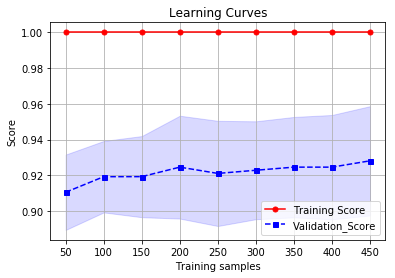

Training samples:  [ 50 100 150 200 250 300 350 400 450]
Train_Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
Valid_scores:  [ 0.91053482  0.91923047  0.91926125  0.92457099  0.92106195  0.92283186
  0.92457099  0.92457099  0.92811081]


In [53]:
Best_Grid_estimator_LC = Best_Grid_estimator

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_GS = np.mean(valid_scores, axis=1)
valid_std_GS = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_GS, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                 valid_mean_GS - valid_std_GS, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_GS)

We notice that there is overfitting in training score line (red). This is due to the best parameters chosen is 'weights': 'distance', and we come try back it using the same data (the distance is the same, therefore the result is equal). we are aware of the range between training score and validation score is narrow too. we observe that adding more data increase a little bit the validation score (variance).

In [54]:
# Amount Failures:

y_pred = Best_Grid_estimator.predict(X_test)
print(sum(y_test != y_pred))


6


In [55]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       0.95      0.90      0.93        42
          1       0.95      0.97      0.96        72

avg / total       0.95      0.95      0.95       114



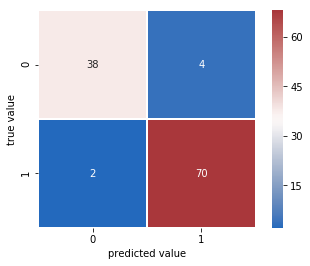

In [56]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');


With the Confusion Matrix, we can deepen in detail and we see how is the performance for each class (apart from the precision_score and recall_score metrics). We can see that the worst performance belongs to the malignant class with 4 false negatives. For this case is very important to know this datum because it means that we have 4 people with cancer and we have been unable to detect it. Therefore, it isn't enough with having a good score but also a good recall_score. As a solution for this problem, we'll try other estimators.

## Using decomposition PCA

PCA (Principal component analysis) is a fast and flexible unsupervised method for dimensionality reduction in data, but it can also be useful as a tool for visualization, for noise filtering, or for feature extraction.

In [57]:
X=breast_cancer.data
y=breast_cancer.target

# project from 30 to 2 dimensions, fit the model with X and apply the dimensionality reduction on X.

pca = PCA(2) 
projected = pca.fit_transform(X)

# Printing shape.

print(X.shape)
print(projected.shape)

(569, 30)
(569, 2)


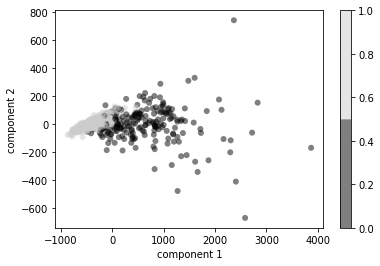

In [58]:
# Plotting components.

plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

We must do some considerations (components mean): The full data is a 30-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

In [59]:
# PCA components: Principal axes in feature space, representing the directions of maximum variance in the data. 
# The components are sorted by explained_variance_.

print('PCA_components: ',pca.components_,'\n')

# Explained_variance: The amount of variance explained by each of the selected components.

print('explained_variance: ',pca.explained_variance_)

PCA_components:  [[  5.08623202e-03   2.19657026e-03   3.50763298e-02   5.16826469e-01
    4.23694535e-06   4.05260047e-05   8.19399539e-05   4.77807775e-05
    7.07804332e-06  -2.62155251e-06   3.13742507e-04  -6.50984008e-05
    2.23634150e-03   5.57271669e-02  -8.05646029e-07   5.51918197e-06
    8.87094462e-06   3.27915009e-06  -1.24101836e-06  -8.54530832e-08
    7.15473257e-03   3.06736622e-03   4.94576447e-02   8.52063392e-01
    6.42005481e-06   1.01275937e-04   1.68928625e-04   7.36658178e-05
    1.78986262e-05   1.61356159e-06]
 [  9.28705650e-03  -2.88160658e-03   6.27480827e-02   8.51823720e-01
   -1.48194356e-05  -2.68862249e-06   7.51419574e-05   4.63501038e-05
   -2.52430431e-05  -1.61197148e-05  -5.38692831e-05   3.48370414e-04
    8.19640791e-04   7.51112451e-03   1.49438131e-06   1.27357957e-05
    2.86921009e-05   9.36007477e-06   1.22647432e-05   2.89683790e-07
   -5.68673345e-04  -1.32152605e-02  -1.85961117e-04  -5.19742358e-01
   -7.68565692e-05  -2.56104144e-04 

#### Choosing the number of components

Using PCA you can also estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

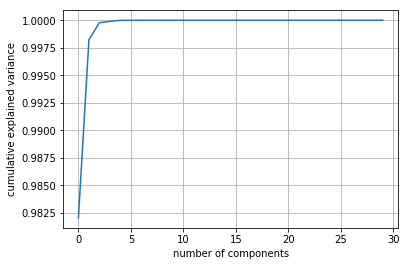

In [60]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid();

We can see that the first 3 components contain approximately 99.9% of cumulative explained variance. therefore with only three componets it would be enough to describe our model.

## Using SVC Model

Support vector machines (SVMs) are a particularly powerful and flexible class of
supervised algorithms for both classification and regression.
we are going to use a grid search cross-validation to explore combinations of parameters.
Here we will adjust C (which controls the margin hardness), gamma (which controls the size of the radial basis function kernel), and kernel to determine the best model:

In [61]:
X=breast_cancer.data
y=breast_cancer.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

breast_cancertratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=124)

for train_index, test_index in breast_cancertratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
Estimator_SVC =  SVC () 

# Now, we are going to use a grid search cross-validation to explore combinations of parameters.

param_grid = {'C':[1, 5, 10, 50], 'gamma':[0.0001, 0.0005, 0.001, 0.005], 'kernel':['linear', 'rbf', 'sigmoid']}

Grid_S_CV= GridSearchCV(Estimator_SVC,param_grid,cv=5)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_SVC = Grid_S_CV.best_estimator_
Best_Grid_estimator_SVC.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_SVC.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_SVC.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

ParameterGrid:  
 [{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma':

##  Learning Curves Support vector machines (SVMs) Estimator with GridSearchCV
Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

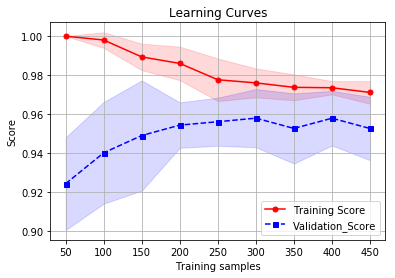

Training samples:  [ 50 100 150 200 250 300 350 400 450]
Train_Scores:  [ 1.          0.998       0.98933333  0.986       0.9776      0.976
  0.97371429  0.9735      0.97111111]
Valid_scores:  [ 0.92426318  0.94010004  0.94898038  0.95432089  0.95606002  0.9578915
  0.95261254  0.95786072  0.95258176]


In [62]:
Best_Grid_estimator_LC = Best_Grid_estimator_SVC

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_SVC = np.mean(valid_scores, axis=1)
valid_std_SVC = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_SVC, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_SVC + valid_std_SVC, 
                 valid_mean_SVC - valid_std_SVC, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_SVC)

Notice that, we are moving in a high score and narrow range (0.92/1 and 0.95/0.97 at the end). curiously, we see a bias in this graph and however, we have got the best score and best recall_score (you can see it below) of all estimators fitting until now. Adding samples do not increase the score (bias). we could try others complex models or add more attributes.

In [63]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       1.00      0.93      0.96        42
          1       0.96      1.00      0.98        72

avg / total       0.97      0.97      0.97       114



In [64]:
# Amount Failures:

y_pred = Best_Grid_estimator_SVC.predict(X_test)
print(sum(y_test != y_pred))


3


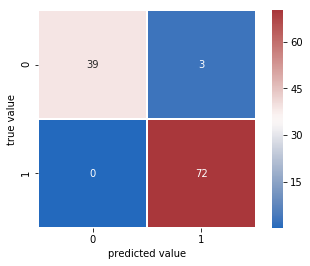

In [65]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 4) Task: Leave-one-out

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the cross_validation module. For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows:

In [66]:
X=breast_cancer.data
y=breast_cancer.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

breast_cancertratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=124)

for train_index, test_index in breast_cancertratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each and fit the model.
param_Grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance']}

Grid_S_CV= GridSearchCV(EstimatorKNN,param_Grid,cv=LeaveOneOut())
Grid_S_CV.fit(X,y)

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_LOO = Grid_S_CV.best_estimator_
Best_Grid_estimator_LOO.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_LOO.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# Once it has been fitted, we get several parameters.

print("ParameterGrid: ",'\n',list(ParameterGrid(param_grid)),'\n')
print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_LOO.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

ParameterGrid:  
 [{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 1, 'gamma': 0.005, 'kernel': 'linear'}, {'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.0005, 'kernel': 'sigmoid'}, {'C': 5, 'gamma': 0.001, 'kernel': 'linear'}, {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}, {'C': 5, 'gamma': 0.001, 'kernel': 'sigmoid'}, {'C': 5, 'gamma':

##  Learning Curves Estimator with GridSearchCV ( Leave-one-out )
Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

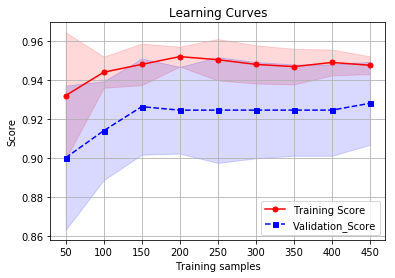

Training samples:  [ 50 100 150 200 250 300 350 400 450]
Train_Scores:  [ 0.932       0.944       0.948       0.952       0.9504      0.948
  0.94685714  0.949       0.94755556]
Valid_scores:  [ 0.90010004  0.9139823   0.92631012  0.92450943  0.92454021  0.92454021
  0.92454021  0.92454021  0.92804925]


In [67]:
Best_Grid_estimator_LC = Best_Grid_estimator_LOO

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean_LOO = np.mean(valid_scores, axis=1)
valid_std_LOO = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean_LOO, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean_LOO + valid_std_LOO, 
                 valid_mean_LOO - valid_std_LOO, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean_LOO)

We see small bias adding more data don't improve so much the score.

In [68]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       0.97      0.86      0.91        42
          1       0.92      0.99      0.95        72

avg / total       0.94      0.94      0.94       114



In [69]:
# Amount Failures:

y_pred = Best_Grid_estimator_LOO.predict(X_test)
print(sum(y_test != y_pred))

7


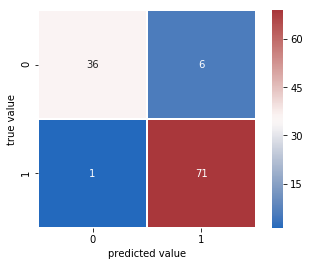

In [70]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

### 5) Task: Razona si es necesario estratificar el proceso de cross-validación analizando la distribución de muestras por clase.

To analyze if our data have to be stratified, we’ll use the absolute frequency and the number of classes (For this case, we have two classes malignant and benign).

We have created two graphics. A bar graph where you can see absolute frequency by each class. And another show us absolute frequency as a function of the number of samples of the dataset for each class.

As you can observe on both graphs, the distribution of absolute frequency isn't uniform neither proportional to the number of samples of the dataset for every class neither between them. The absolute frequency of malignant class (blue line) decreases while the absolute frequency of benign class (orange line) increase. Consequently, we can conclude that we need to stratify the data.

Another important question that we must know when we work with models of classification is if our dataset is balanced or not. We can say that a dataset isn’t balanced when the number of observations isn’t the same for each class or when the difference between the number of observations between classes is high.

To know if our dataset is balanced or not. We look at the bar chart, and we observe that absolute frequency for each class isn't the same. There is a difference of 145 between them, that it to say, the benign class has around 68% more. Therefore, We can conclude that our dataset isn't balanced.

For our model works well we should do some changes in the data before fitting it:

1.	Try to get more data (we only have 569 samples).
2.	Balance the data.
3.	Stratification using, for example, Stratified K-Folds cross-validator, Stratified ShuffleSplit cross-validator, etc.

You can see all this below.


Absolute frequency: [212 357]
Types of Classes:  ['malignant' 'benign']
Columns of absolute frecuency by classes and by samples:  
 [[ 43   7]
 [ 65  35]
 [ 83  67]
 [104  96]
 [124 126]
 [146 154]
 [158 192]
 [173 227]
 [185 265]
 [195 305]
 [206 344]]


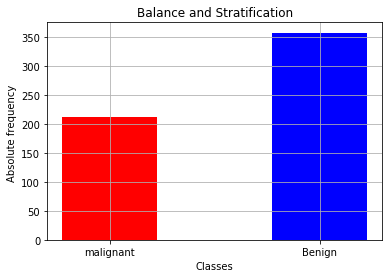

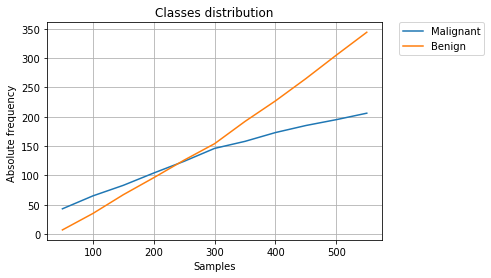

In [87]:

X=breast_cancer.data
y=breast_cancer.target

z=[]
h=[]

c=np.bincount(y)  
f=np.arange(50,569,50)
              
for cont in f:
    b=np.bincount(y[0:cont])
    z.append(np.array(b))
    h.append(np.array(cont)) 
    
g=np.array(z)
k=np.array(h)

'''
print(g[:,0]/k)
print(k)

plt.plot(f,z)
plt.title('Stratified distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()
'''
print('Absolute frequency:',c)
print('Types of Classes: ',breast_cancer.target_names)
print('Columns of absolute frecuency by classes and by samples: ','\n',g)

ind = np.arange(2) 

plt.bar(ind,c,color=['red', 'blue'],width=0.45)
plt.xticks(ind, ('malignant', 'Benign'))
plt.title('Balance and Stratification')
plt.xlabel('Classes')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()

label1=(g[:,0])
label2=(g[:,1])

plt.plot(f,label1,label='Malignant')
plt.plot(f,label2,label='Benign')
#plt.axis([1,2,0,360])
plt.title('Classes distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Absolute frequency: [42 72]
Types of Classes:  ['malignant' 'benign']
Columns of absolute frecuency by classes and by samples:  
 [[ 0  1]
 [ 1  5]
 [ 3  8]
 [ 5 11]
 [ 6 15]
 [ 7 19]
 [10 21]
 [13 23]
 [16 25]
 [18 28]
 [20 31]
 [22 34]
 [22 39]
 [25 41]
 [26 45]]


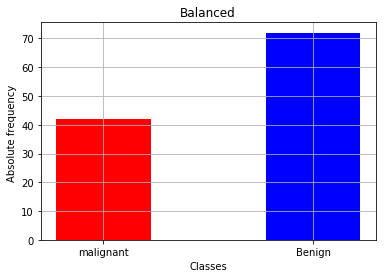

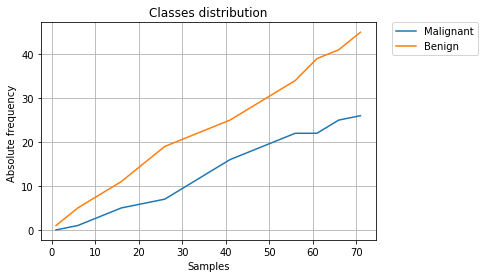

In [72]:
# Here, we can see 'y_test stratification analisys result'.

y=y_test

z=[]
h=[]

c=np.bincount(y)  
f=np.arange(1,72,5)
              
for cont in f:
    b=np.bincount(y[0:cont])
    z.append(np.array(b))
    h.append(np.array(cont)) 
    
g=np.array(z)
k=np.array(h)

print('Absolute frequency:',c)
print('Types of Classes: ',breast_cancer.target_names)
print('Columns of absolute frecuency by classes and by samples: ','\n',g)

ind = np.arange(2) 

plt.bar(ind,c,color=['red', 'blue'],width=0.45)
plt.xticks(ind, ('malignant', 'Benign'))
plt.title('Balanced')
plt.xlabel('Classes')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.show()

label1=(g[:,0])
label2=(g[:,1])

plt.plot(f,label1,label='Malignant')
plt.plot(f,label2,label='Benign')
#plt.axis([1,2,0,360])
plt.title('Classes distribution')
plt.xlabel('Samples')
plt.ylabel('Absolute frequency ')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 7) Task : Siguiendo la misma aproximación del último apartado, introduce el tipo de métrica de distancia (parámetro “metric”) dentro del proceso de validación cruzada. Evalúa los resultados y las ganancias/pérdidas de capacidad de generalización del modelo.

In [73]:
X=breast_cancer.data
y=breast_cancer.target

# First of all, we are going to create Split arrays into random train and test subsets with StratifiedShuffleSplit.

breast_cancertratified = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=124)

for train_index, test_index in breast_cancertratified.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]    

# We create a instance of model.
        
EstimatorKNN = KNeighborsClassifier()

# Now, We create a Grid of parameters with a discrete number of values for each. Now, we included 'metric' in param_grid.

param_grid = {'n_neighbors': [3,5,7,9,11,13,15],'weights':['uniform','distance'],'metric': ['manhattan','chebyshev','minkowski'],
             'p':[3,5]}

# we put the param_grid into GridSearchCV and fit it. Notice that the GridSearchCV instance when “fitting” it, all 
# the possible combinations of parameter values are evaluated and the best combination is retained.
# Note: If the estimator is a classifier and y is either multiclass, StratifiedKFold is used.

Grid_S_CV= GridSearchCV(EstimatorKNN,param_grid,cv=10)
Grid_S_CV.fit(X_train,y_train)

# Once it has been fitted, we get several parameters.

print("Best estimator: " , Grid_S_CV.best_estimator_,'\n')
print("Best Score: ",Grid_S_CV.best_score_)
print("Best Parameters ",Grid_S_CV.best_params_)
print("Classes ",Grid_S_CV.classes_,'\n')

# Now, we came back fit it Best_Grid_estimator with.

Best_Grid_estimator_Metrics = Grid_S_CV.best_estimator_
Best_Grid_estimator_Metrics.fit(X_train,y_train)

# We use best_estimator attribute and predict method to predict test data.

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
acc_score = accuracy_score (y_pred, y_test)

# We can use different ways to calculate the score or accuracy.

print("score_test: " + str(1-(sum(y_test != y_pred)/len(y_test))))
print('score_test: ',Best_Grid_estimator_Metrics.score(X_test,y_test))
print('accuracy_score: ',acc_score,'\n')

# Lastly, Build a text report showing the main classification metrics.

print('precision_score: ', precision_score(y_test, y_pred, average='micro'))
print('recall_score: ', recall_score(y_test, y_pred, average='micro'))

Best estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=7, p=3,
           weights='distance') 

Best Score:  0.942857142857
Best Parameters  {'metric': 'manhattan', 'n_neighbors': 7, 'p': 3, 'weights': 'distance'}
Classes  [0 1] 

score_test: 0.956140350877
score_test:  0.956140350877
accuracy_score:  0.956140350877 

precision_score:  0.956140350877
recall_score:  0.956140350877


### Learning Curve KNeighborsClassifier Estimator (weights-Metrics) with GridSearchCV 

Now, we are going to analyze the model above with Graphing Learning Curves. It shows us the validation and training score of an estimator for varying numbers of training samples. We can find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error.

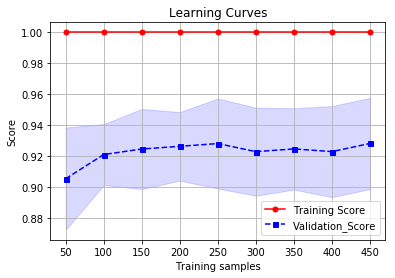

Training samples:  [ 50 100 150 200 250 300 350 400 450]
Train_Scores:  [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]
Valid_scores:  [ 0.90537899  0.92100038  0.92457099  0.92631012  0.92811081  0.92286264
  0.92463255  0.92289342  0.92817237]


In [74]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='r', marker='o', markersize=5,
         label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score')
plt.fill_between(train_sizes, valid_mean + valid_std, 
                 valid_mean - valid_std, alpha=0.15, color='b')

plt.title('Learning Curves')
plt.legend(loc='lower right')
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()

print('Training samples: ' ,train_sizes)
print('Train_Scores: ',train_mean)
print('Valid_scores: ',valid_mean)

This has a perfomance and score alike learning curve in task 6 above. we'll try others estimators.

In [75]:
# Classification_report:

print('classification_report: ','\n','\n',classification_report(y_test, y_pred))

classification_report:  
 
              precision    recall  f1-score   support

          0       1.00      0.88      0.94        42
          1       0.94      1.00      0.97        72

avg / total       0.96      0.96      0.96       114



In [76]:
# Amount Failures:

y_pred = Best_Grid_estimator_Metrics.predict(X_test)
print(sum(y_test != y_pred))


5


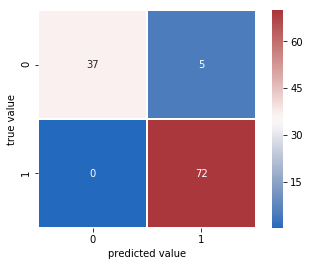

In [77]:
# Confusion Matrix

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat, cmap="vlag", robust=True,linewidths=.75, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

# Comparative analysis between classifiers

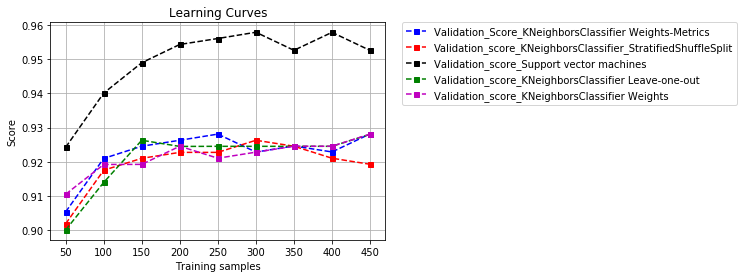

In [78]:
Best_Grid_estimator_LC_M = Best_Grid_estimator_Metrics

train_sizes ,  train_scores ,  valid_scores  =  learning_curve (
    Best_Grid_estimator_LC_M,  X ,  y ,shuffle = True, random_state = 42,  
    train_sizes = [50,100,150,200,250,300,350,400,450],  cv = 5) 

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, valid_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Validation_Score_KNeighborsClassifier Weights-Metrics')
#plt.fill_between(train_sizes, valid_mean + valid_std, 
                 #valid_mean - valid_std, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_SSS, color='r', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier_StratifiedShuffleSplit')
#plt.fill_between(train_sizes, valid_mean_SSS + valid_std_SSS, 
                 #valid_mean_SSS - valid_std_SSS, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_SVC, color='k', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_Support vector machines')
#plt.fill_between(train_sizes, valid_mean_SVC + valid_std_SVC, 
                 #valid_mean_SVC - valid_std_SVC, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_LOO, color='g', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier Leave-one-out')
#plt.fill_between(train_sizes, valid_mean_LOO + valid_std_LOO, 
                 #valid_mean_LOO - valid_std_LOO, alpha=0.15, color='b')

plt.plot(train_sizes, valid_mean_GS, color='m', linestyle='--', 
         marker='s', markersize=5, label='Validation_score_KNeighborsClassifier Weights')
#plt.fill_between(train_sizes, valid_mean_GS + valid_std_GS, 
                #valid_mean_GS - valid_std_GS, alpha=0.15, color='b')
    
plt.title('Learning Curves')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Training samples')
plt.ylabel('Score')
plt.grid()
plt.show()


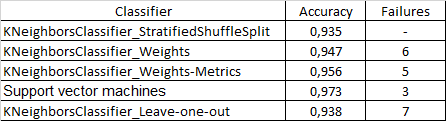

## Final conclusion:

The best estimator has been Support vector machines SVM with a high score of 0.973 and negatives false in the confusion matrix of 3. Therefore, we can be satisfied with the outcomes. Maybe, if we tunning the hyperparameters could get improve something else our outcome. As well, we could balance the data and see whether the model improves.

# Model persistence
Fynally, It is possible to save a model in the scikit by using Python’s built-in persistence model:

Example: joblib.dump(EstimatorKNN, 'TaskModule8.pkl') 

Later you can load back the pickled model (possibly in another Python process) with:  

Example: joblib.load('TaskModule8.pkl') 